# Importing The Libraries

In [1]:

#-----------------------importing the libraries-------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------only for jupyter notebook text color change in plots---------------
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Importing Datasets

In [2]:
#-------------------------importing datasets----------------------------------
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
gender = pd.read_csv('../gender_submission.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing Step

In [3]:
#for checking missing no. of missing value present in training and testing dataset
print(train.isna().sum())
print('\n')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
#-------------------------------missing value in age--------------------------
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer = imputer.fit(train.iloc[:,[5]])
train.iloc[:,[5]] = imputer.transform(train.iloc[:,[5]])

imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer = imputer.fit(test.iloc[:,[4]])
test.iloc[:,[4]] = imputer.transform(test.iloc[:,[4]])

In [5]:
#-----------------------------mission value in Fare---------------------------
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer = imputer.fit(test.iloc[:,[8]])
test.iloc[:,[8]] = imputer.transform(test.iloc[:,[8]])

In [6]:
#----------------------------mission value in Ebarked-------------------------
print(train['Embarked'].value_counts()) # from here we knew that s is the most frequent word
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer = imputer.fit(train.iloc[:,[11]])
train.iloc[:,[11]] = imputer.transform(train.iloc[:,[11]])

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
#-------------------get dummy variable for sex and embarked-------------------
train = pd.get_dummies(data = train, columns = ["Sex","Embarked"] , prefix = ["Sex","Embarked"])
test = pd.get_dummies(data = test, columns = ["Sex","Embarked"] , prefix = ["Sex","Embarked"])


In [8]:
#-----------if data is present in cabin then cabin = 1 otherwise 0------------
train['Cabin'] = train['Cabin'].fillna(0)
train.loc[train.Cabin !=0, 'Cabin'] = 1 #it means, when cabin !=0 then cabin =1
        
test['Cabin'] = test['Cabin'].fillna(0)
test.loc[test.Cabin !=0, 'Cabin'] = 1

In [9]:
#create new feature ageencode 
train['Ageencode'] = train['Age']    
train['Ageencode'] = pd.qcut(train['Ageencode'], 4)
test['Ageencode'] = test['Age']    
test['Ageencode'] = pd.qcut(test['Ageencode'], 4)

train['FamilySize'] = train['SibSp'] + train['Parch'] +1
train['IsAlone'] = 1
train.loc[train.FamilySize >1 , 'IsAlone'] = 0
test['FamilySize'] = test['SibSp'] + test['Parch'] +1
test['IsAlone'] =1
test.loc[test.FamilySize >1 , 'IsAlone'] = 0

In [10]:
#-----------label encoding in ageencode--------------------------------------
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_Ageencode = LabelEncoder()
train.iloc[:,[15]] = labelencoder_Ageencode.fit_transform(train.iloc[:,[15]])
labelencoder_Ageencode_y = LabelEncoder()
test.iloc[:,[14]] = labelencoder_Ageencode_y.fit_transform(test.iloc[:,[14]])


/home/ankit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#-------------take first term from ticket and create new feature-------------- 
ticket = train['Ticket']
ticket1 =np.str()
for i in range(len(ticket)):
        ticket1 = ticket1 + ticket[i][0]
ticket1 = list(ticket1)
train['Ticket[0]'] = ticket1

ticket = test['Ticket']
ticket2 =np.str()
for i in range(len(ticket)):
        ticket2 = ticket2 + ticket[i][0]
ticket2 = list(ticket2)
test['Ticket[0]'] = ticket2

In [12]:
#------------------------encoding  of ticket----------------------------------
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
train.iloc[:,[18]] = labelencoder.fit_transform(train.iloc[:,[18]])
test.iloc[:,[17]] = labelencoder.fit_transform(test.iloc[:,[17]])


In [13]:
#-----------------------------seprate miss, mr etc----------------------------
train['Title'] = train['Name'].str.split(',' , expand = True)[1].str.split('.', expand = True)[0]
print(train['Title'].value_counts())
title1 = (train['Title'].value_counts() < 10)
train['Title'] = train['Title'].apply(lambda x: ' Misc' if title1.loc[x] == True else x)
print(train['Title'].value_counts())

test['Title'] = test['Name'].str.split(',' , expand = True)[1].str.split('.', expand = True)[0]
print(test['Title'].value_counts())
title1 = (test['Title'].value_counts() < 10)
test['Title'] = test['Title'].apply(lambda x: ' Misc' if title1.loc[x] == True else x)
print(test['Title'].value_counts())


 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Sir               1
 Capt              1
 Don               1
 Mme               1
 the Countess      1
 Ms                1
 Lady              1
 Jonkheer          1
Name: Title, dtype: int64
 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Misc       27
Name: Title, dtype: int64
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dona        1
 Ms          1
 Dr          1
Name: Title, dtype: int64
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Misc        7
Name: Title, dtype: int64


In [14]:
#--------------------devide fare into 4 parts and encode it ------------------

train['Farecode'] = pd.qcut(train['Fare'], 4)
train.iloc[:,[20]] = labelencoder.fit_transform(train.iloc[:,[20]])

test['Farecode'] = pd.qcut(test['Fare'], 4)
test.iloc[:,[19]] = labelencoder.fit_transform(test.iloc[:,[19]])


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ageencode,FamilySize,IsAlone,Ticket[0],Farecode
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028,1.379349,1.904602,0.602694,4.196409,1.497194
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751,1.114652,1.613459,0.489615,4.925584,1.118156
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,9.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000,15.000000,3.000000


In [16]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ageencode,FamilySize,IsAlone,Ticket[0],Farecode
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535,0.363636,0.636364,0.244019,0.110048,0.645933,1.373206,1.839713,0.605263,3.885167,1.473684
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103,0.481622,0.481622,0.430019,0.313324,0.478803,1.133510,1.519072,0.489380,4.210438,1.140292
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,0.000000,0.000000,1.000000,2.750000,2.000000,1.000000,8.000000,2.750000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000,13.000000,3.000000


In [17]:
#-------------------get dummies of title , ageencode , farecode---------------
train = pd.get_dummies(data = train, columns = ["Title","Ageencode","Farecode"] , prefix = ["Title","Ageencode","Farecode"])
test = pd.get_dummies(data = test, columns = ["Title","Ageencode","Farecode"] , prefix = ["Title","Ageencode","Farecode"])

#--------------spliting dataset into training and testing set-----------------
x = train.iloc[:,[2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].values
y = train.iloc[:, 1].values
x_test = test.iloc[:,[1,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
y_test = gender.iloc[:,1].values

#------------split data into training and classvalidation state---------------
from sklearn.model_selection import train_test_split
x_train , x_cv , y_train , y_cv = train_test_split(x , y , test_size = .25 , random_state = 0)



In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,...,Title_ Mr,Title_ Mrs,Ageencode_0,Ageencode_1,Ageencode_2,Ageencode_3,Farecode_0,Farecode_1,Farecode_2,Farecode_3
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,...,0.038850,0.011245,-0.044837,0.004505,0.016332,0.027143,0.041583,-0.014715,-0.035996,0.009110
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,...,-0.549199,0.339040,0.049152,-0.078719,0.046226,-0.001575,-0.221610,-0.095648,0.084239,0.233638
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,...,0.142698,-0.149209,0.186053,0.155155,-0.028720,-0.337882,0.422231,0.213210,-0.057507,-0.579206
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.081163,0.030248,...,0.180808,0.169578,-0.669055,-0.135177,0.077383,0.768231,-0.051099,-0.021288,-0.021924,0.094452
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,...,-0.250489,0.063407,0.179360,-0.025880,-0.075565,-0.091325,-0.245973,-0.197540,0.119821,0.324653
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,...,-0.333905,0.225852,0.187094,-0.145092,-0.106911,0.059054,-0.257599,-0.203848,0.165192,0.297252
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,...,-0.183766,0.105203,-0.033107,-0.101846,0.014682,0.134384,-0.292815,-0.254580,-0.106424,0.655020
Sex_female,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,...,-0.867334,0.547600,0.078231,-0.057022,0.002780,-0.019013,-0.193014,-0.064664,0.080195,0.177966
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,...,0.867334,-0.547600,-0.078231,0.057022,-0.002780,0.019013,0.193014,0.064664,-0.080195,-0.177966
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,...,-0.072567,0.061395,-0.036375,0.029719,-0.019643,0.020617,-0.053303,-0.160296,0.000938,0.213221


In [19]:
#------------------------for finding correlation------------------------------
print(train.corr())

data1_x = ['Pclass', 'Age','SibSp',  'Parch', 'Fare','Cabin','Embarked_C','Embarked_Q','Embarked_S',
           'FamilySize','IsAlone', 'Ticket[0]']
Target = ['Survived']
for k in data1_x:
    if train[k].dtype != 'float64' :
        print('Survival Correlation by:', k)
        print(train[[k, Target[0]]].groupby(k, as_index=False).mean())
        print('-'*10, '\n')
 

               PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId       1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived         -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass           -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age               0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp            -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch            -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare              0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
Sex_female       -0.042939  0.543351 -0.131900 -0.081163  0.114631  0.245489   
Sex_male          0.042939 -0.543351  0.131900  0.081163 -0.114631 -0.245489   
Embarked_C       -0.001205  0.168240 -0.243292  0.030248 -0.059528 -0.011069   
Embarked_Q       -0.033606  0.003650  0.221009 -0.031415 -0.026354 -0.081228   
Embarked_S        0.022204 -0.149683  0.

# Ploting the datasets

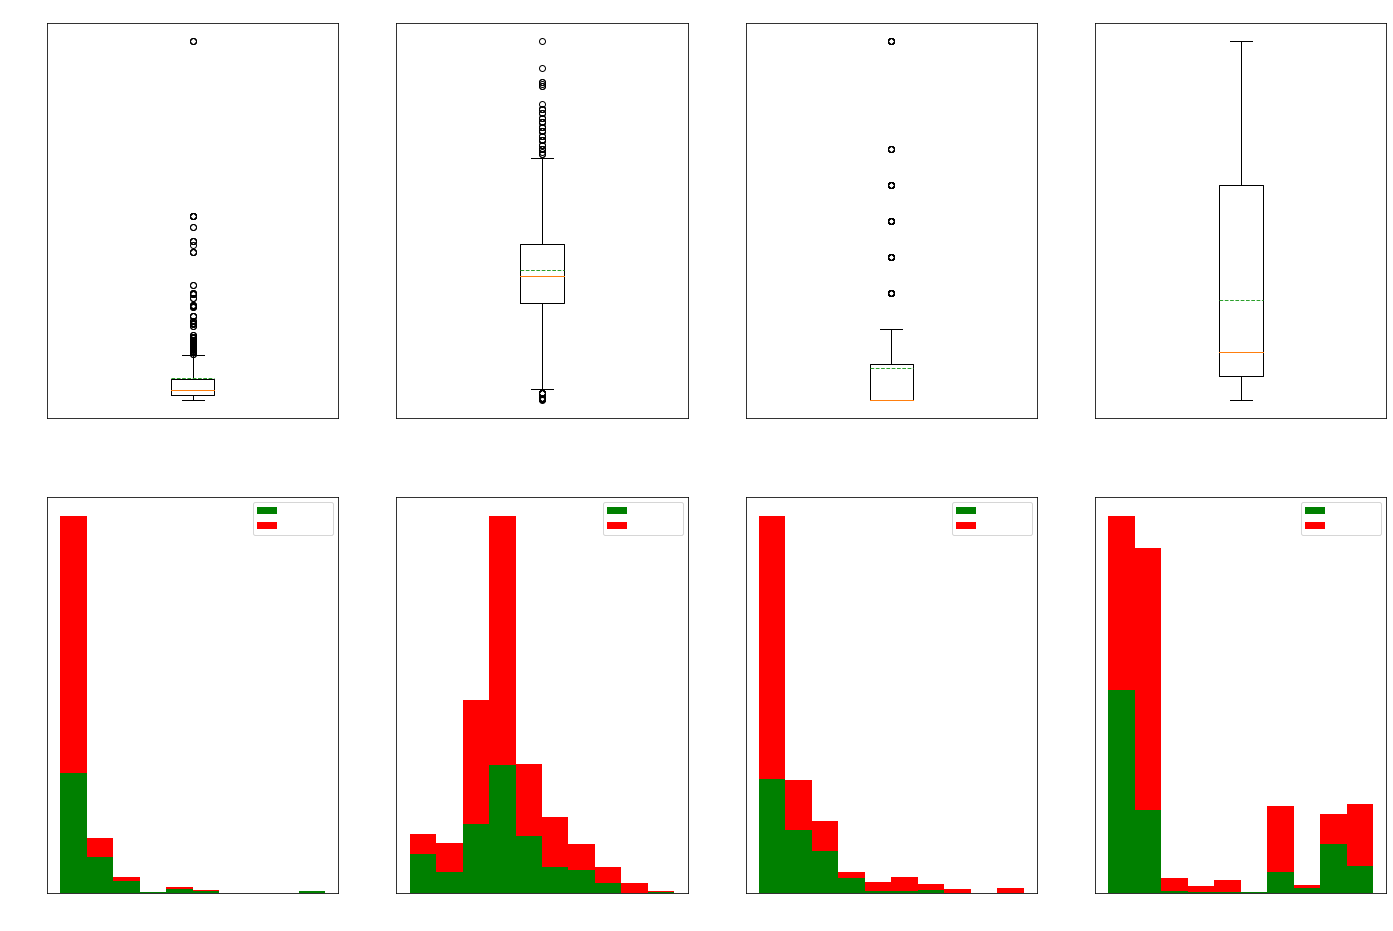

In [20]:
#-----------------------------------------------------------------------------
#-----------------------plot data ageencode vs survived-----------------------
plt.figure(figsize=[24,16])
plt.subplot(241)
plt.boxplot(x = train['Fare'], showmeans = True, meanline = True)
plt.title('Fare boxplot')
plt.ylabel('Fare ($)')

plt.subplot(242)
plt.boxplot(train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(243)
plt.boxplot(train['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(244)
plt.boxplot(x = train['Ticket[0]'], showmeans = True, meanline = True)
plt.title('Ticket boxplot')
plt.ylabel('Ticket starting term')

plt.subplot(245)
plt.hist(x = [train[train['Survived']==1]['Fare'] ,train[train['Survived']==0]['Fare']],stacked=True,
         color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(246)
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']] ,stacked=True,
         color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(247)
plt.hist(x = [train[train['Survived']==1]['FamilySize'], train[train['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(248)
plt.hist(x = [train[train['Survived']==1]['Ticket[0]'], train[train['Survived']==0]['Ticket[0]']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Ticket[0] Histogram by Survival')
plt.xlabel('Ticket[0] ')
plt.ylabel('# of Passengers')
plt.legend()

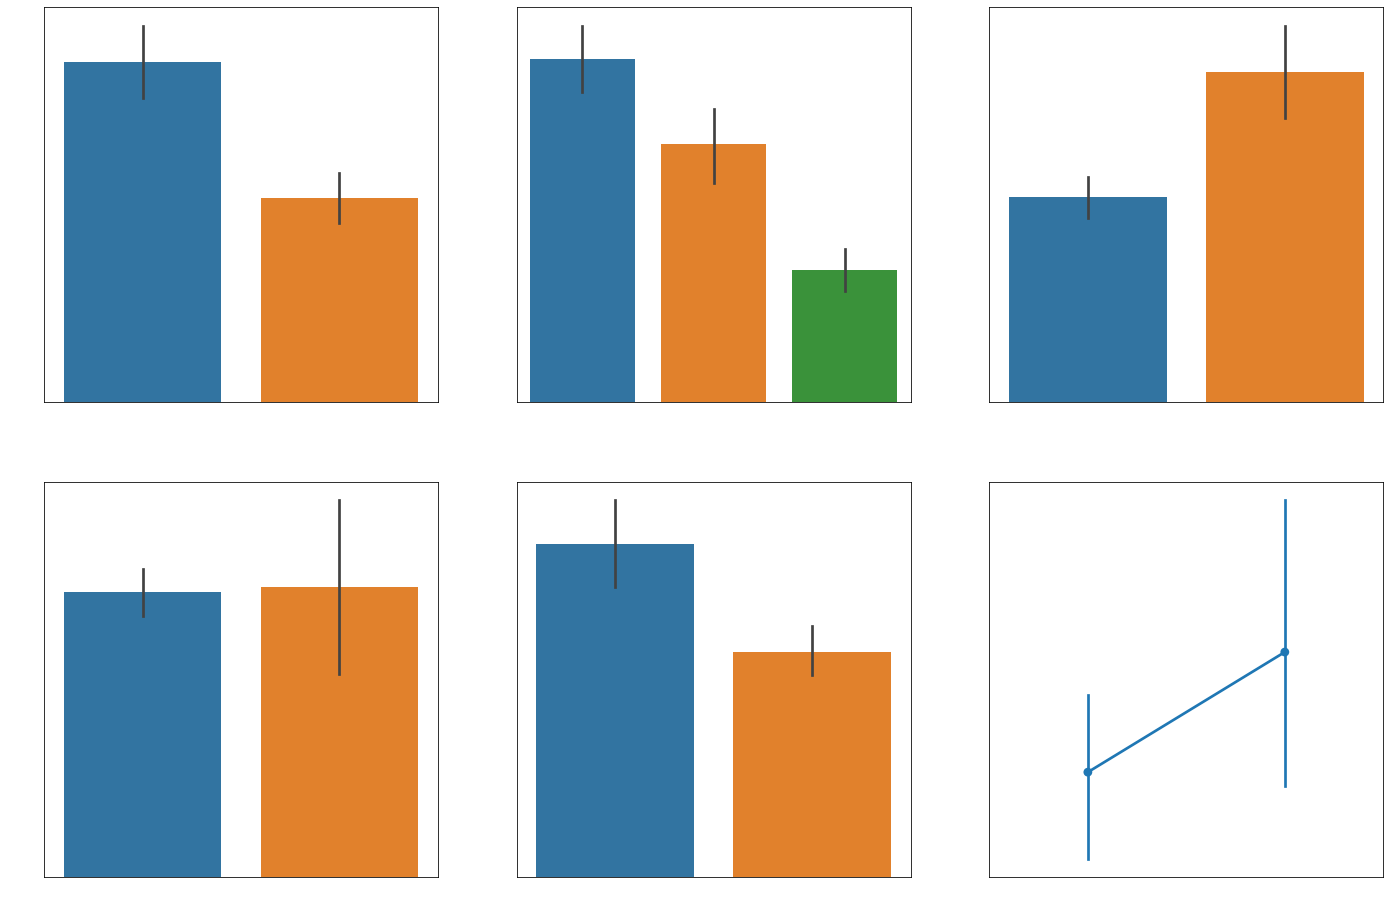

In [21]:

import seaborn as sns
fig, axes = plt.subplots(2,3,figsize=[24,16])
sns.barplot(x = 'IsAlone', y = 'Survived', data = train , ax = axes[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', data = train, ax = axes[0,1])
sns.barplot(x = 'Embarked_C',y = 'Survived', data = train, ax = axes[0,2])
sns.barplot(x = 'Embarked_Q',y = 'Survived', data = train, ax = axes[1,0])
sns.barplot(x = 'Embarked_S',y = 'Survived', data = train, ax = axes[1,1])
sns.pointplot(x = 'Ageencode_0', y = 'Survived', data = train, ax = axes[1,2])


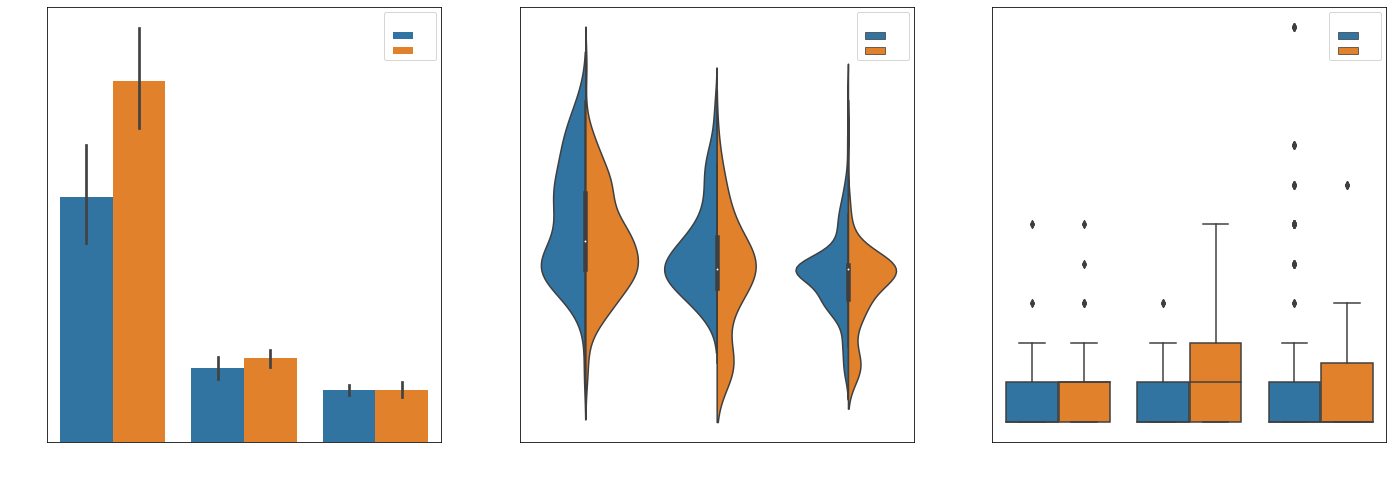

In [22]:
fig, axes = plt.subplots(1,3, figsize=[24,8])
sns.barplot(x = 'Pclass',y= 'Fare', hue = 'Survived', data = train, ax = axes[0])
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axes[1])
sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axes[2])


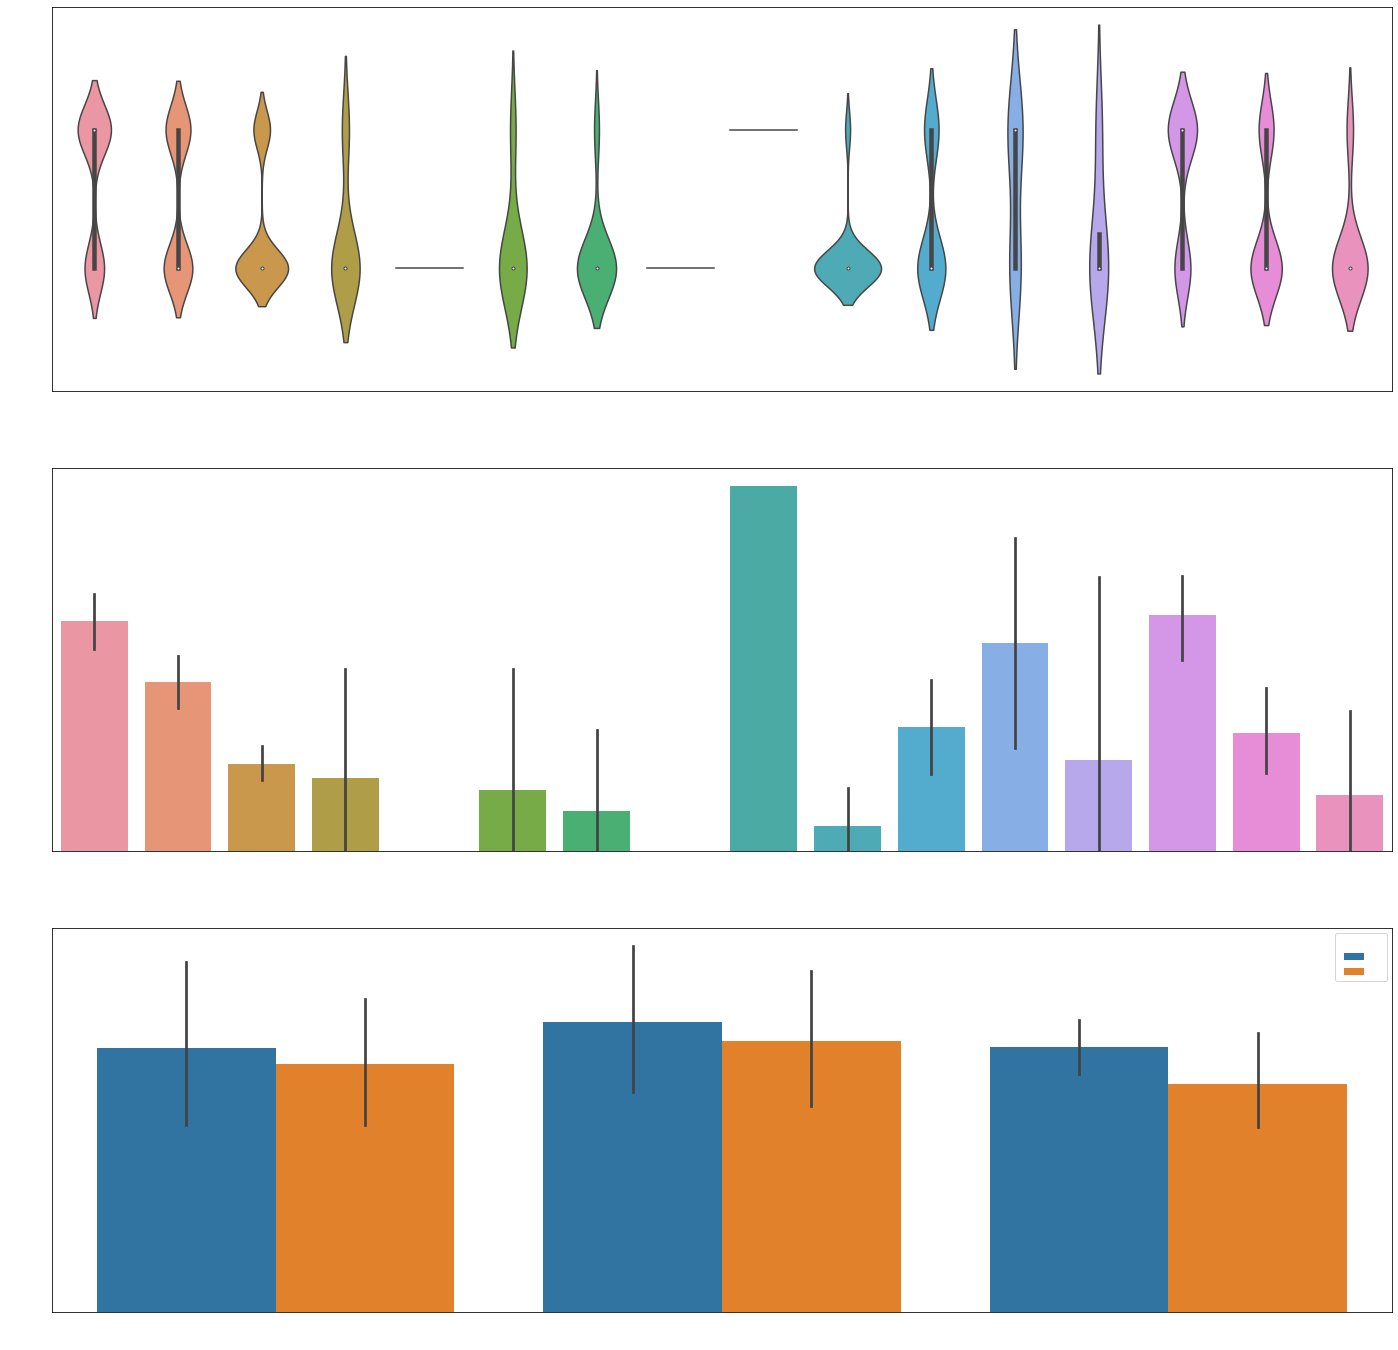

In [23]:
fig, axes = plt.subplots(3,1, figsize=[24,24])
sns.violinplot(x = 'Ticket[0]', y = 'Survived', data = train, split = True, ax = axes[0])
sns.barplot(x = 'Ticket[0]',y= 'Survived', data = train, ax = axes[1])
sns.barplot(x = 'Pclass', y = 'Ticket[0]', hue = 'Survived', data = train, ax = axes[2])

0    549
1    342
Name: Survived, dtype: int64


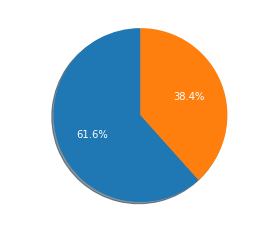

In [24]:
#------------------------explode 1st slice (pie plot)-------------------------
print(train['Survived'].value_counts())
plt.pie(train['Survived'].value_counts(),labels = ['Survived','Dead'],
        autopct = '%1.1f%%', shadow = True , startangle = 90)
plt.show()

In [25]:
"""#-------------------------------pair plot-------------------------------------
pp = sns.pairplot(train ,  hue = 'Survived' , palette = 'deep', height=1.2, diag_kind = 'kde',
             diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[]) """

"#-------------------------------pair plot-------------------------------------\npp = sns.pairplot(train ,  hue = 'Survived' , palette = 'deep', height=1.2, diag_kind = 'kde',\n             diag_kws=dict(shade=True), plot_kws=dict(s=10))\npp.set(xticklabels=[]) "

# 3d Surface Image

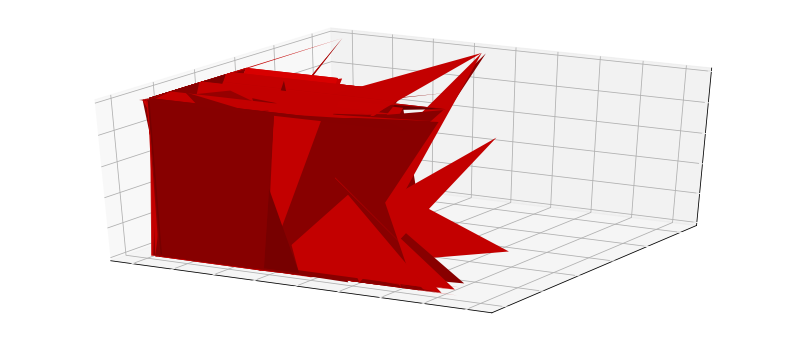

In [26]:
#------------------------------3d Surface Image-------------------------------
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize =(14,6))
X = np.array([train['Pclass'],train['Age']])
Y = np.array([train['Fare']])
Z = np.array([train['Survived']])
#specify the 3d graphics to draw with projection = 3d
ax = fig.add_subplot(1,1,1,projection = '3d')
ax.plot_surface(X,Y,Z, rstride = 4 , cstride = 4 , linewidth = 0, color = 'r')


# Heat Map

Text(0.5, 1.05, 'Pearson Correlation of Features')

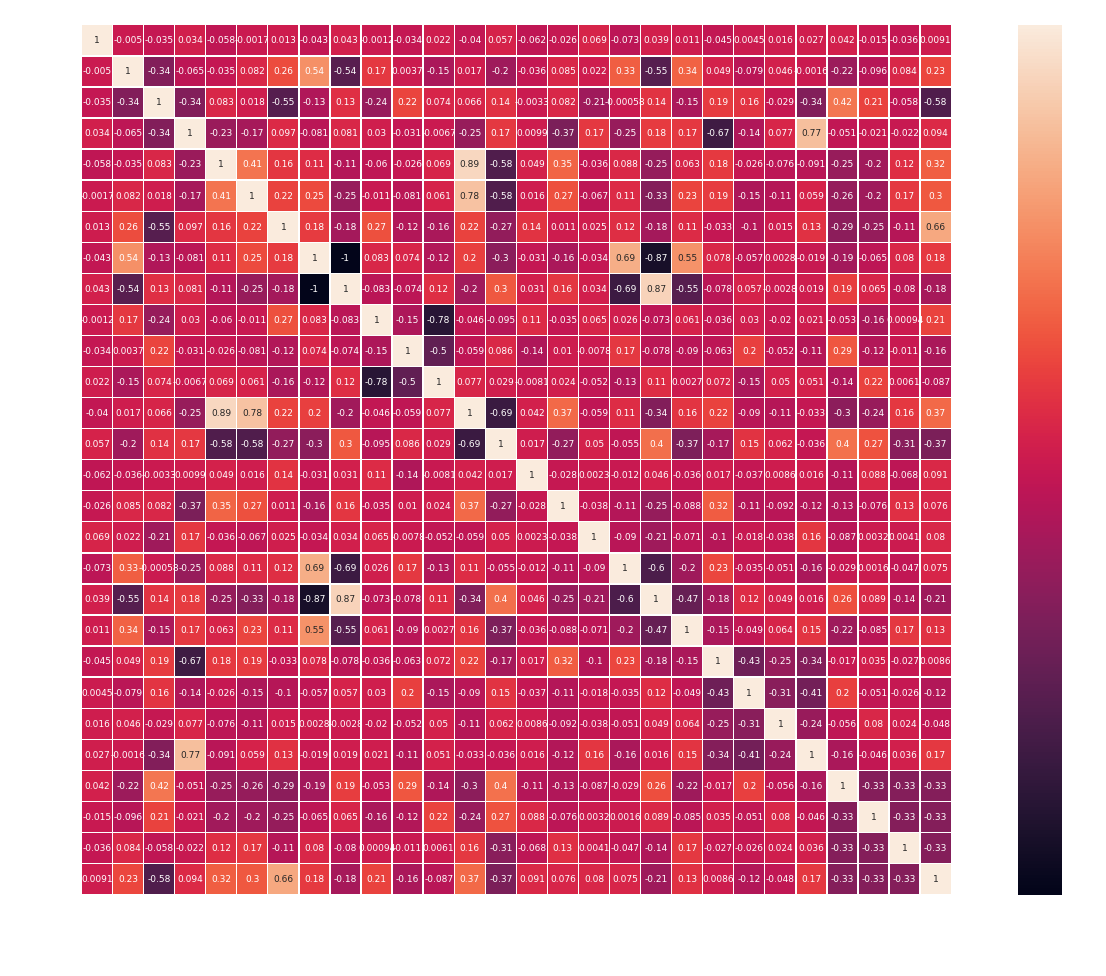

In [27]:
import seaborn as sns
fig , axes = plt.subplots(figsize =(24, 16))
fig = sns.heatmap(train.corr() ,square = True, annot=True, linewidths=0.3,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':9 })
plt.title('Pearson Correlation of Features', y=1.05, size=15)


# Creating Classifier Model
# Fitting Classifier To The Training Set

In [28]:
#-----------------------------------------------------------------------------
#---------------------creating classifier model-------------------------------

#---------------fitting classifier to the training set------------------------

def ensemble_models(x_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    classifier1 = RandomForestClassifier(n_estimators = 3, criterion = 'entropy' , 
                                    random_state = 0)
    classifier1.fit(x_train, y_train)
    
    from sklearn.ensemble import AdaBoostClassifier
    classifier2 = AdaBoostClassifier()
    classifier2.fit(x_train, y_train)
    
    from sklearn.ensemble import BaggingClassifier
    classifier3 = BaggingClassifier()
    classifier3.fit(x_train, y_train)
    
    from sklearn.ensemble import ExtraTreesClassifier
    classifier4 = ExtraTreesClassifier()
    classifier4.fit(x_train, y_train)
    
    from sklearn.ensemble import GradientBoostingClassifier
    #----------------------------by parameter tuning-------------------------- 
    classifier5 = GradientBoostingClassifier()
    classifier5.fit(x_train, y_train)
    
    print('RandomForestClassifier training accuracy: ', classifier1.score(x_train, y_train))
    print('AdaBoostClassifier training accuracy: ', classifier2.score(x_train, y_train))
    print('BaggingClassifier training accuracy: ', classifier3.score(x_train, y_train))
    print('ExtraTreesClassifier training accuracy: ', classifier4.score(x_train, y_train))
    print('GradientBoostingClassifier training accuracy: ', classifier5.score(x_train, y_train))
    
    return classifier1, classifier2, classifier3 , classifier4 , classifier5


In [29]:
def gaussian_process_models(x_train, y_train):
    from sklearn.gaussian_process import GaussianProcessClassifier
    classifier1 = GaussianProcessClassifier()
    classifier1.fit(x_train, y_train)
    
    print('GaussianProcessClassifier training accuracy: ', classifier1.score(x_train, y_train))
    
    return classifier1


In [30]:
def linear_models(x_train , y_train):
    from sklearn.linear_model import LogisticRegression
    classifier1 = LogisticRegression(C=1.2, random_state = 0, max_iter = 1500)
    classifier1.fit(x_train, y_train)
    
    from sklearn.linear_model import PassiveAggressiveClassifier
    classifier2 = PassiveAggressiveClassifier()
    classifier2.fit(x_train, y_train)
    
    from sklearn.linear_model import RidgeClassifierCV
    classifier3 = RidgeClassifierCV()
    classifier3.fit(x_train , y_train)
    
    from sklearn.linear_model import SGDClassifier
    classifier4 = SGDClassifier()
    classifier4.fit(x_train , y_train)
    
    from sklearn.linear_model import Perceptron
    classifier5 = Perceptron()
    classifier5.fit(x_train , y_train)
    
    print('LogisticRegression training accuracy: ', classifier1.score(x_train, y_train))
    print('PassiveAggressiveClassifier training accuracy: ', classifier2.score(x_train, y_train))
    print('RidgeClassifierCV training accuracy: ', classifier3.score(x_train, y_train))
    print('SGDClassifier training accuracy: ', classifier4.score(x_train, y_train))
    print('Perceptron training accuracy: ', classifier5.score(x_train, y_train))
    
    return classifier1, classifier2, classifier3 , classifier4 , classifier5


In [31]:
def naive_bayes_models(x_train , y_train):
    from sklearn.naive_bayes import BernoulliNB
    classifier1 = BernoulliNB()
    classifier1.fit(x_train, y_train)
    
    from sklearn.naive_bayes import GaussianNB
    classifier2 = GaussianNB()
    classifier2.fit(x_train, y_train)
    
    print('naive_bayes BernoulliNB training accuracy: ', classifier1.score(x_train, y_train))
    print('naive_bayes GaussianNB training accuracy: ', classifier2.score(x_train, y_train))
    
    return classifier1, classifier2


In [32]:
def nearest_neighbors_models(x_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier1 = KNeighborsClassifier(n_neighbors = 5 ,metric = 'minkowski' , 
                                  p = 2)
    classifier1.fit(x_train, y_train)
    
    print('KNeighborsClassifier training accuracy: ', classifier1.score(x_train, y_train))
    
    return classifier1

In [33]:
def svm_models(x_train , y_train):
    from sklearn.svm import SVC
    classifier1 = SVC(kernel = 'rbf' , random_state = 0)
    classifier1.fit(x_train, y_train)
    
    from sklearn.svm import NuSVC
    classifier2 = NuSVC(kernel = 'rbf' , random_state = 0)
    classifier2.fit(x_train, y_train)
    
    from sklearn.svm import LinearSVC
    classifier3 = LinearSVC(dual=False)
    classifier3.fit(x_train , y_train)
    
    print('SVC training accuracy: ', classifier1.score(x_train, y_train))
    print('NuSVC training accuracy: ', classifier2.score(x_train, y_train))
    print('LinearSVC training accuracy: ', classifier3.score(x_train, y_train))
    
    return classifier1 , classifier2 , classifier3


In [34]:
def trees_models(x_train , y_train):
    from sklearn.tree import DecisionTreeClassifier
    classifier1 = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
    classifier1.fit(x_train, y_train)
    
    from sklearn.tree import ExtraTreeClassifier
    classifier2 = ExtraTreeClassifier()
    classifier2.fit(x_train , y_train)
    
    print('DecisionTreeClassifier training accuracy: ', classifier1.score(x_train, y_train))
    print('ExtraTreesClassifier training accuracy: ', classifier2.score(x_train, y_train))
    
    return classifier1 , classifier2


In [35]:
def discriminant_analysis_models(x_train, y_train):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    classifier1 = LinearDiscriminantAnalysis()
    classifier1.fit(x_train ,y_train)
    print('LinearDiscriminantAnalysis training accuracy: ', classifier1.score(x_train, y_train))  
    return classifier1


In [36]:
def XGBClassifier_models(x_train ,y_train):
    import xgboost as xgb
    classifier1 =  xgb.XGBClassifier(colsample_bytree = 0.5 ,learning_rate = .25, 
                                     max_depth =4,min_child_weight = 7,gamma = 0.4)
    classifier1.fit(x_train , y_train)
    print('XGBClassifier training accuracy: ', classifier1.score(x_train, y_train))
    return classifier1


In [37]:
def models(x_train, y_train):
    model1 = ensemble_models(x_train, y_train)
    model2 = gaussian_process_models(x_train, y_train)
    model3 = linear_models(x_train , y_train)
    model4 = naive_bayes_models(x_train , y_train)
    model5 = nearest_neighbors_models(x_train, y_train)
    model6 = svm_models(x_train , y_train)
    model7 = trees_models(x_train , y_train)
    model8 = discriminant_analysis_models(x_train, y_train)
    model9 = XGBClassifier_models(x_train ,y_train)
    
    return (model1 ,model2 , model3 , model4 , model5 , model6 , model7 ,model8, model9 )


In [38]:
model = models(x_train , y_train)

RandomForestClassifier training accuracy:  0.9505988023952096
AdaBoostClassifier training accuracy:  0.844311377245509
BaggingClassifier training accuracy:  0.9790419161676647
ExtraTreesClassifier training accuracy:  0.9910179640718563
GradientBoostingClassifier training accuracy:  0.9101796407185628
GaussianProcessClassifier training accuracy:  0.9775449101796407
LogisticRegression training accuracy:  0.8323353293413174
PassiveAggressiveClassifier training accuracy:  0.811377245508982
RidgeClassifierCV training accuracy:  0.8368263473053892
SGDClassifier training accuracy:  0.7919161676646707
Perceptron training accuracy:  0.6946107784431138
naive_bayes BernoulliNB training accuracy:  0.7934131736526946
naive_bayes GaussianNB training accuracy:  0.8053892215568862
KNeighborsClassifier training accuracy:  0.7874251497005988
SVC training accuracy:  0.6826347305389222
NuSVC training accuracy:  0.8248502994011976
LinearSVC training accuracy:  0.8368263473053892
DecisionTreeClassifier trai

In [39]:
#-----------------------------------------------------------------------------
#---------------------confusion matrix----------------------------------------

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
#------------confusion matrix except model[1] and model[4]--------------------
def confusion_matrix_accuracy(models1):
    for i in range(len(models1)):
        cm = confusion_matrix(y_cv , models1[i].predict(x_cv))
        print(models1[i])
        print('\n')
        print(cm)
        print(classification_report(y_cv , models1[i].predict(x_cv)))
        # Applying k-Fold Cross Validation
        accuracies = cross_val_score(estimator = models1[i], X = x_train, y = y_train, cv = 10)
        print(accuracies.mean())
        print(accuracies.std())
        print()
        
n = [0,2,3,5,6]        
for j in n:
    confusion_matrix_accuracy(model[j])

#-----------------------confusion matrix for model[0]-------------------------
cm = confusion_matrix(y_cv , model[1].predict(x_cv))
print(model[1])
print('\n')
print(cm)
print(classification_report(y_cv , model[1].predict(x_cv)))
accuracies = cross_val_score(estimator = model[1], X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print()

#-----------------------confusion matrix for model[4]-------------------------
cm = confusion_matrix(y_cv , model[4].predict(x_cv))
print(model[4])
print('\n')
print(cm)
print(classification_report(y_cv , model[4].predict(x_cv)))
accuracies = cross_val_score(estimator = model[4], X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print()

#-----------------------confusion matrix for model[7]-------------------------
cm = confusion_matrix(y_cv , model[7].predict(x_cv))
print(model[7])
print('\n')
print(cm)
print(classification_report(y_cv , model[7].predict(x_cv)))
accuracies = cross_val_score(estimator = model[7], X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print()

#-----------------------confusion matrix for model[8]-------------------------
cm = confusion_matrix(y_cv , model[8].predict(x_cv))
print(model[8])
print('\n')
print(cm)
print(classification_report(y_cv , model[8].predict(x_cv)))
accuracies = cross_val_score(estimator = model[8], X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[[117  22]
 [ 20  64]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       139
           1       0.74      0.76      0.75        84

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

0.7814337403889643
0.03158083593343344

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, le

0.670737222976029
0.026685524600140093

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=0, shrinking=True,
      tol=0.001, verbose=False)


[[114  25]
 [ 26  58]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       139
           1       0.70      0.69      0.69        84

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

0.808457711442786
0.04490169198882121

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


[[120  19]
 [ 21  63]]
              precision    recall  f1-score   support

  

In [40]:
#-------------------------------apply knn model-------------------------------
# Importing the Keras libraries and packages

# libraries for NN
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
     # Part 2 - Now let's make the ANN!
    
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 14, kernel_initializer= 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100,500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

cm = confusion_matrix(y_cv , grid_search.predict(x_cv))
print(grid_search.score(x_train, y_train))
print('\n')
print(cm)
print(classification_report(y_cv , grid_search.predict(x_cv)))


Using TensorFlow backend.
/home/ankit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'

  FitFailedWarning)


AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'

In [ ]:
#-----------------hyper parameter tuning for xgboost model--------------------
""" import xgboost as xgb
classifier1 =  xgb.XGBClassifier(colsample_bytree = 0.5 ,learning_rate = .25, max_depth =4,
                                 min_child_weight = 7,gamma = 0.4)
classifier1.fit(x_train , y_train)
print('XGBClassifier training accuracy: ', classifier1.score(x_train, y_train))
    
from sklearn.model_selection import GridSearchCV
parameters = [{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
               "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
               "min_child_weight" : [ 1, 3, 5, 7 ],
               "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
               "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }]
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_ """

In [ ]:
''' cm = confusion_matrix(y_cv , classifier1.predict(x_cv))
print(classifier1)
print('\n')
print(cm)
print(classification_report(y_cv , classifier1.predict(x_cv)))
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print() '''

In [41]:
#-----------------hyper parameter tuning for logistic regression-------------------
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=1.2, random_state = 0, max_iter = 1500)
classifier1.fit(x_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5]}
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
print("best_accuracy:- ", best_accuracy)
best_parameters = grid_search.best_params_
print("best_parameters:- ", best_parameters)
cm = confusion_matrix(y_cv , classifier1.predict(x_cv))
print(classifier1)
print('\n')
print(cm)
print(classification_report(y_cv , classifier1.predict(x_cv)))
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())
print()

best_accuracy:-  0.8265038444142923
best_parameters:-  {'C': 0.5}
LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[[118  21]
 [ 17  67]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       139
           1       0.76      0.80      0.78        84

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

0.8265038444142923
0.03855808267728414



In [42]:
#-----------------------------------------------------------------------------
#--------------------------predecting test value------------------------------

y_pred = model[2][0].predict(x_test)  

In [43]:
#------------------------------submission-------------------------------------
gender['Survived'] = model[2][0].predict(x_test)
gender[['PassengerId', 'Survived']].to_csv("submission.csv", index = False)         
